## Install natura language toolkit 

In [19]:
!pip install nltk

## Major steps

1. import libraries
2. pre-process by removing stop words
3. make a frequency table with frequency of stop words
4. Compute score of each sentence of the document.
5. Store the sentence in summary.

### Import libraries

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [50]:
#Load the document and store each line in a list
filename = "C:\\Users\\ayush\\Desktop\\TIET - 5th Sem 2020-21\\NLP\\COVID_19_dataset\\documents\\001.txt"
f = open((filename),'r')
text = f.read()#Append each line to list
f.close()

In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Convert all the words into lower case words and removing stopwords

In [24]:
sent_tokens = nltk.sent_tokenize(text)
word_tokens = nltk.word_tokenize(text)
word_tokens_lower = [word.lower() for word in word_tokens]
stopWords = list(set(stopwords.words("english")))
word_tokens_refined = [x for x in word_tokens_lower if x not in stopWords]
print(len(word_tokens_refined))

205


### Make a frequency table to compute the frequency of each word

In [25]:
freqTable = dict()
for word in word_tokens_refined:
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1
print(len(freqTable))

130


### Visualize the streingth of all words

<BarContainer object of 130 artists>

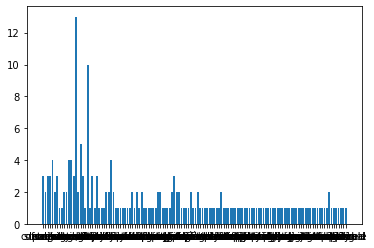

In [39]:
import matplotlib.pyplot as plt
X = freqTable.keys()
Y = freqTable.values()
plt.bar(X,Y)

### Sentence Scoring

In [41]:
sentenceValue = dict()
for sentence in sent_tokens:
    for word,freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq
print(len(sentenceValue))

10


### Generating Summary

In [48]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
average = int(sumValues/len(sentenceValue))
summary = ''
for sentence in sent_tokens:
    if sentence in sentenceValue and sentenceValue[sentence] > (1.2*average):
        summary += "" +sentence

## Original Text

In [47]:
print(text)

Success from two leading coronavirus vaccine programs likely means other frontrunners will also show strong protection against COVID-19, Bill Gates said Tuesday.

The fact that two coronavirus vaccines recently showed strong protection against COVID-19 bodes well for other leading programs led by AstraZeneca, Novavax, and Johnson & Johnson, Bill Gates said Tuesday.The billionaire Microsoft founder and philanthropist said it will be easier to boost manufacturing and distribute these other shots to the entire world, particularly developing nations.The vaccine space has seen a flurry of good news in recent days, marked by overwhelming success in late-stage trials by both Pfizer and Moderna. The studies showed both vaccines provided strong protection against the virus compared to a placebo. "With the very good news from Pfizer and Moderna, we think it's now likely that AstraZeneca, Novavax, and Johnson & Johnson will also likely show very strong efficacy," Gates told journalist Andrew Ross

## Summary Of the text

In [49]:
print(summary)

Success from two leading coronavirus vaccine programs likely means other frontrunners will also show strong protection against COVID-19, Bill Gates said Tuesday.The fact that two coronavirus vaccines recently showed strong protection against COVID-19 bodes well for other leading programs led by AstraZeneca, Novavax, and Johnson & Johnson, Bill Gates said Tuesday.The billionaire Microsoft founder and philanthropist said it will be easier to boost manufacturing and distribute these other shots to the entire world, particularly developing nations.The vaccine space has seen a flurry of good news in recent days, marked by overwhelming success in late-stage trials by both Pfizer and Moderna."With the very good news from Pfizer and Moderna, we think it's now likely that AstraZeneca, Novavax, and Johnson & Johnson will also likely show very strong efficacy," Gates told journalist Andrew Ross Sorkin.
